In [23]:
#Galarza Jhostin
#Castillo Jair
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

dataframe = pd.read_csv('DSBreastCancerSinDatosPerdidos.csv',sep=';')
clasificadores = ['Benigno','Maligno']

In [9]:
dataframe.head(10)

,Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,CLASE
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [13]:
dataframe.groupby('CLASE').size()

CLASE
2    444
4    239
dtype: int64

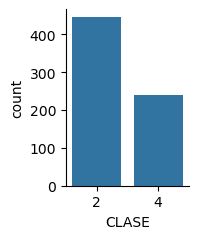

In [15]:
sb.catplot(x = 'CLASE',data=dataframe,kind="count",height=2.5,aspect=.8)

In [17]:
y = dataframe['CLASE']
x = dataframe.drop('CLASE',axis=1)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=5)

#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

labels = ["Benigno","Maligno"]
matriz = confusion_matrix(y_test,predicciones, labels=[2,4])
print(pd.DataFrame(matriz, index = labels, columns = labels))


#print(tn, fp, fn, tp)
#sb.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
#plt.title('Confusion Matrix')
#plt.xlabel('Predicted')
#plt.ylabel('True')

print(classification_report(y_test,predicciones,target_names=clasificadores))

         Benigno  Maligno
Benigno      106       30
Maligno       48       21
              precision    recall  f1-score   support

     Benigno       0.69      0.78      0.73       136
     Maligno       0.41      0.30      0.35        69

    accuracy                           0.62       205
   macro avg       0.55      0.54      0.54       205
weighted avg       0.60      0.62      0.60       205

